# Задача 1

Дана обучающая выборка

<table>
    <tr><td>$x$</td><td>1</td><td>1</td><td>0</td><td>0</td><td>-1</td></tr>
    <tr><td>$y$</td><td>4</td><td>4</td><td>0</td><td>2</td><td>6</td></tr>
</table>

1) изобразить точки;

2) методом наименьших квадратов построить модель вида $f(x) = \beta_0+\beta_1x+\beta_2x^2$;построить график этой функции;

3) построить модель того же вида методом ридж-регрессии с параметром регуляризации $\lambda = 1$; построить график этой функции.

Замечание: при ручных вычислениях по методу наименьших квадратов рекомендуется составить систему $X^⊤X\beta = X^⊤y$ и решить ее. Регуляризованная система: $(X^⊤X+\lambda I)\beta = X^⊤y$, где $I$ - единичная матрица.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Обучающая выборка:

In [117]:
x_train = [1, 1, 0, 0, -1]
y_train = [4, 4, 0 ,2,  6]

1) Изображение точек на плоскости $xy$

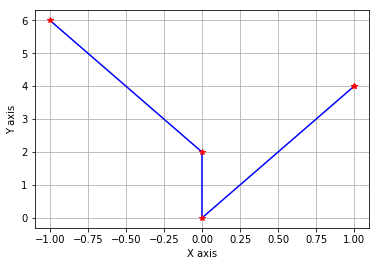

In [118]:
plt.plot(x_train,y_train,color='blue')
plt.plot(x_train,y_train,'*',color='red')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid()

2) Построим модель вида $f(x) = \beta_0+\beta_1x+\beta_2x^2$ методом МНК.

In [119]:
f = lambda x: [1, x, x*x]
X = np.array(map(f,x_train))
y = np.array(y_train).transpose()#column


Получили систему линейных уравнений $X\beta = y$. Чтобы найти $\beta$ умножим обе части на $X^T$ слева.

In [120]:
Xtr = X.transpose()
Xtr

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  0,  0, -1],
       [ 1,  1,  0,  0,  1]])

In [121]:
X = np.dot(Xtr,X)
y = np.dot(Xtr,y)

Решим полученную систему:

In [122]:
beta = np.linalg.solve(X,y)
beta

array([ 1., -1.,  4.])

In [123]:
f = lambda x: [beta[0]+beta[1]*x+beta[2]*x*x]
y = map(f,x_train) 
y

[[4.0], [4.0], [1.0], [1.0], [6.0]]

Построим  график полученной модели:

In [124]:
x_points1 = np.linspace(-1,1,30)
y_points1 = map(f,x_points1)

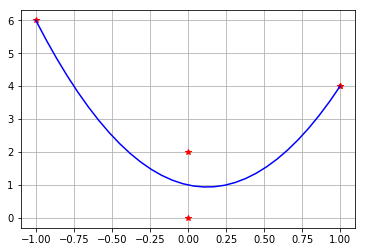

In [125]:
plt.plot(x_train,y_train,'*',color='red')
plt.plot(x_points1,y_points1,color='blue')
plt.grid()

3) Построим модель $f(x) = \beta_0+\beta_1x+\beta_2x^2$ методом ридж-регрессии

In [126]:
x_train = [1, 1, 0, 0, -1]
y_train = [4, 4, 0 ,2,  6]
l = 1


In [127]:
f = lambda x: [x**0, x**1, x**2]
X = np.array(map(f,x_train))
y = np.array(y_train).transpose()#column
  

Получили систему линейных уравнений $X\beta = y$. Умножим обе части слева на $X^T$: 

In [128]:
Xtr = X.transpose()
X = np.dot(Xtr,X)
y = np.dot(Xtr,y)


Регуляризуем систему с параметром $\lambda = 1$:

In [129]:
for i in xrange(len(X[:])):
    X[i,i] = X[i,i]+l
X  

array([[6, 1, 3],
       [1, 4, 1],
       [3, 1, 4]])

Решим регуляризованную систему:

In [130]:
beta = np.linalg.solve(X,y)
beta

array([ 1.5, -0.5,  2.5])

Построим график полученной модели.

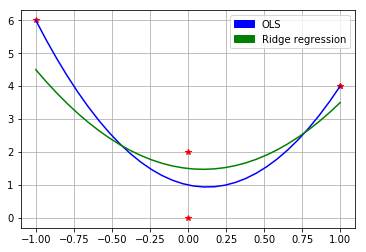

In [131]:
f = lambda x: [beta[0]+beta[1]*x+beta[2]*x*x]
x_points2 = np.linspace(-1,1,30)
y_points2 = map(f,x_points2)
import matplotlib.patches as mpatches
plt.plot(x_train,y_train,'*',color='red')
plt.plot(x_points1,y_points1,color='blue')
plt.plot(x_points2,y_points2,color='green')
plt.grid()
patch_blue = mpatches.Patch(color='blue', label='OLS')
patch_green = mpatches.Patch(color='green', label='Ridge regression')
plt.legend(handles=[patch_blue,patch_green])
plt.show()

# Задача 14
Дана обучающая выборка 

<table>
    <tr>
        <td>$x_1$</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>$x_2$</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>$y$</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
</table>

С помощью наивного байесова классификатора оценить вероятности 
$Pr(Y = 0 | X_1 = 1, X_2 = 1)$; $Pr(Y = 1 | X_1 = 1, X_2 = 1)$

In [132]:
x1 = np.array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0])
x2 = np.array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1])
y  = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


Найдем априорные вероятности $Pr(y=0)$ и $Pr(y=1)$:

In [133]:
Py_eq_0 = float(len(np.where(y == 0)[0]))/len(y)
Py_eq_1 = float(len(np.where(y == 1)[0]))/len(y)
Py_eq_0,Py_eq_1

(0.5, 0.5)

Найдем маргинальные апостериорные вероятности:
$Pr(x_1 = 1| y = 0)$,$Pr(x_2 = 1| y = 0)$

In [134]:
Px1_eq1_if_y_eq0 = float(len(np.where((x1 == 1)&(y == 0))[0]))/len(np.where(y == 0)[0])
Px2_eq1_if_y_eq0 = float(len(np.where((x2 == 1)&(y == 0))[0]))/len(np.where(y == 0)[0])
Px2_eq1_if_y_eq0,Px1_eq1_if_y_eq0


(0.6, 0.4)

Найдем $Pr(x_1 = 1)$ и $Pr(x_2 = 1)$

In [135]:
Px1_eq1 = float(len(np.where(x1 == 1)[0]))/len(x1)
Px2_eq1 = float(len(np.where(x2 == 1)[0]))/len(x2)
Px1_eq1,Px2_eq1

(0.5, 0.8)

Найдем апостериорные вероятности по формуле Байеса:

In [136]:
Py_eq0_if_x1_eq1_x2_eq1 = Px1_eq1_if_y_eq0*Px2_eq1_if_y_eq0*Py_eq_0/(Px1_eq1+Px2_eq1)
Py_eq1_if_x1_eq1_x2_eq1 = Px1_eq1_if_y_eq0*Px2_eq1_if_y_eq0*Py_eq_1/(Px1_eq1+Px2_eq1)
Py_eq0_if_x1_eq1_x2_eq1,Py_eq1_if_x1_eq1_x2_eq1

(0.0923076923076923, 0.0923076923076923)

Ответ:$Pr(y = 0|x_1 = 1,x_2 = 1) = 0.0923$ $Pr(y = 1|x_1 = 1,x_2 = 1) = 0.0923$ 

# Задача 29
Может ли использование коррелированных переменных улучшить качество предсказания? Рассмотрим задачу классификации с двумя классами. Пусть пространство признаков двумерное. Объекты каждого класса имеют нормальное распределение с математическим ожиданием (-1,-1) и (1,1) соответственно и единичной матрицей ковариации каждый. Априорные вероятности классов равны $1/2$.

1) Вычислить коэффициент корреляции для переменных $x_1$, $x_2$.

2) Найти байесов классификатор и вычислить байесову ошибку для усеченной задачи,рассматривая только одну переменную $x_1$.

3) Найти байесов классификатор и вычислить байесову ошибку для исходной задачи.

4) Приводит ли использование второй переменной к уменьшению ошибки?

In [137]:
from sklearn.naive_bayes import GaussianNB

Сгенерируем выборки для первого и второго классов:

In [138]:
c1 = np.random.multivariate_normal([-1, -1],[[1,0],[0,1]],300) #y = 0




In [139]:
c2 = np.random.multivariate_normal([1, 1],[[1,0],[0,1]],300)#y = 1



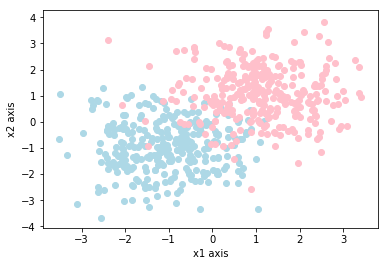

In [140]:
plt.scatter(c1[:,0],c1[:,1],color='lightblue')
plt.scatter(c2[:,0],c2[:,1],color='pink')
plt.xlabel('x1 axis')
plt.ylabel('x2 axis')

1) Составим $x_1$ и $x_2$ и найдем коэффициент корреляции между ними:

In [141]:
x1x2 = np.vstack((c1,c2))
x1 = np.array(x1x2[:,0])
x2 = np.array(x1x2[:,1])
np.corrcoef(x1,x2)

array([[ 1.        ,  0.51731612],
       [ 0.51731612,  1.        ]])

Ответ: $r_{x_1x_2} = 0.51731612,$

Сгененрируем массив $y$ , $y = 0$, если объект принадлежит первому классу,и $y = 1$,если объект принадлежит второму классу. $Pr(y = 0) = Pr(y = 1) = 1/2$

In [142]:
y =np.array([0]*600) 
y[300:601] = 1


2) Построим наивный байесовский классификатор, используя только $x_1$

In [143]:
model = GaussianNB()
X=x1.reshape(-1,1)
model.fit(X, y)

GaussianNB(priors=None)

Сгенерируем тестовую выборку:

In [144]:

c1 = np.random.multivariate_normal([-1, -1],[[1,0],[0,1]],700)
c2 = np.random.multivariate_normal([-1, -1],[[1,0],[0,1]],700)
x1x2_test = np.vstack((c1,c2))

x_test=x1x2_test[:,0].reshape(-1,1)
y_test=np.array([0]*1400)
y_test[700:1401] = 1


Hайдем ошибку:

In [145]:
#from sklearn.metrics import log_loss
y_predicted = model.predict(x_test)
#log_loss(y_test,y_predicted)
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(y_predicted, y_test)
print(CF)

[[588 595]
 [112 105]]


In [146]:
fpr = float(CF[1, 0])/(CF[0, 0] + CF[1, 0])
fnr = float(CF[0, 1])/(CF[0, 1] + CF[1, 1])
print(fpr, fnr)

(0.16, 0.85)


In [147]:
tnr = 1 - fpr
tpr = 1 - fnr
print(tnr, tpr)

(0.84, 0.15000000000000002)


In [148]:
err = (fpr+fnr)/(fpr+fnr+tnr+tpr)
err

0.505

Ответ $R(x) = 0.5$

3) Построим наивный байесовский классификатор используя обе переменные $x_1 x_2$

In [149]:
model = GaussianNB()
X=x1x2
model.fit(X, y)

GaussianNB(priors=None)

и найдем ошибку для этого случая:

In [150]:
#x_test = x1x2_test
y_predicted = model.predict(x_test)
#log_loss(y_test,y_predicted)
CF = confusion_matrix(y_predicted, y_test)
print(CF)

[[592 595]
 [108 105]]


In [151]:
fpr = float(CF[1, 0])/(CF[0, 0] + CF[1, 0])
fnr = float(CF[0, 1])/(CF[0, 1] + CF[1, 1])
print(fpr, fnr)

(0.15428571428571428, 0.85)


In [152]:
tnr = 1 - fpr
tpr = 1 - fnr
print(tnr, tpr)

(0.8457142857142858, 0.15000000000000002)


In [153]:
err = (fpr+fnr)/(fpr+fnr+tnr+tpr)
err

0.5021428571428571

Ответ $R(x) = 0.5$

4)Ответ: нет